# DSCI 632 Final

Your final is to use the dataset of your choice and the techniques in this class to do the following:

1. Define and describe the dataset (10 points)
1. Clean the data (10 points)
1. Transform the clean data (10 points)
1. Show your analysis of the data (10 points)

## Ground Rules

1. Explain everything you're doing with pyspark in the code cells using [markdown](https://www.markdownguide.org/cheat-sheet) in text cells. Help the reader understand why you're doing each step so they can re-create it. Remember, this is an assignment to show how you analyze data to a potential employer. Don't use code comments to explain things.
1. All of the sections are heading 1 in markdown, so use heading 2 to write your explainations, and heading 3 for any sub-headers. Check in your table of contents view in colab to make sure each point is listed before you turn this in.
1. Don't hesisate to use multiple code/text cells in each section, as long as they're all labeled and described.
1. Assume that the reader doesn't have access to the dataset on your local machine. Provide a link to the dataset you're using, or if able, include code to copy it from a public source. Don't rely on uploading from your local machine. (Importing from Google Drive is ok, as long as you provide the link to the data)
1. If using GCP services, include screenshots from your console if there's a step that you aren't able to re-produce in code. Using the SDK is always preferred, but you won't lose points for using screenshots and explaining them.
1. Import the data ONCE, then transform it to fit your analysis.
1. Don't overwrite data, make new columns for new transformations. You can always drop columns later, but you can't get overwritten values back.
1. Feel free to work with classmates, but all work submitted must be your own.
1. Make sure to run disconnect the runtime and re-run the notebook at least once before turning in. If you are getting certain Java runtime errors, this might also help.

## Extra Credit Opportunities!

- If you provide a link to this notebook on your public GitHub page instead of turning it in as an attachment, you will get 2 points extra credit.
- Extra credit will be given for using the [Google Cloud SDK](https://cloud.google.com/sdk/) to create/use/destroy any cloud resources, up to 2 points per section, 8 points total.
 - Don't be afraid to look at the GCP example colab notebooks from the class notes, the GCP documentation, or GitHub for examples.
- If this notebook is self-contained, you will get 5 points extra credit. (Requirements below)
 - The data is imported without relying on Google Drive, as the paths to data in Google Drive are user-specific. Downloads from public storage buckets/services are fine. (1 point)
 - It be run from start to finish without making any changes to paths, code, or variable names. (1 point)
 - All calls to external services, including GCP, are done programatically, no screenshots explaining how it worked in a browser console. (Using an API or SDK, 2 points)
 - All cloud resources are destroyed at the end of the notebook in a seperate section (Also via API or SDK, 1 point)

---

# Section 1: Define and describe the dataset

10 points

Import the dataset, and describe why you'll be analyzing in it. You can summarize a few columns, show a more information on the relavent features, or but help the reader understand what the dataset is, what is in it, and why you picked it.

Some questions that it might help you to answer:
1. Why are you choosing this dataset?
1. What variables will you use?
1. What analysis(es) will you run?
1. Do you have any hypotheses? What are they?

### This section should include one or more of the following:
- A histogram of several features relavent to your analysis
- The schema of the dataset, with the datatypes assigned correctly
- A text cell with explainations of the relavent features in [markdown](https://www.markdownguide.org/cheat-sheet)
- Use Spark SQL or built-in methods to show a range of values
- Most common words/n-grams found

**LINK TO THE DATASET**

https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/data

**DESCRIPTION OF THE DATASET**

The GTZAN dataset is the primary data source for music genre classification projects. It consists of 1,000 audio samples, each 30 seconds in duration, categorized into 10 different music genres. Each genre has 100 audio clips.
For this project, I will be using the 'features_30_sec.csv' which has the 30 sec duration audio samples.


The columns are named with different feauture names:



*   chroma_stft_mean, chroma_stft_var (short-term Fourier transform chroma features)

*   rms_mean, rms_var (root mean square features)

*   spectral_centroid_mean, spectral_centroid_var (center of mass of the spectrum)
*   spectral_bandwidth_mean, spectral_bandwidth_var (width of the spectrum)

*   rolloff_mean, rolloff_var (roll-off frequency)
*   zero_crossing_rate_mean, zero_crossing_rate_var (rate at which the signal changes sign)

*   harmony_mean, harmony_var, percept_mean, percept_var (possibly related to harmonic and percussive components)
*   tempo (the speed at which a piece of music is played)

*   mfcc1_mean to mfcc20_mean, mfcc1_var to mfcc20_var (Mel-frequency cepstral coefficients)










**REASON FOR SELECTION:**


The GTZAN dataset is widely used in the field of music genre classification, and it serves as a benchmark dataset for evaluating the performance of various machine learning and deep learning models. Its popularity arises from its diversity in terms of genres and the number of audio samples, making it a suitable choice for training and testing classification algorithms.

**ANALYSES INTENDED TO RUN**

Using a RandomForestClassifier for genre classification and to predict the genres.

**HYPOTHESIS**

There might be a significant difference in tempo across different genres, with genres like Classical showing lower values on average compared to Rock or Metal.

In [1]:
!pip install pyspark



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=bc45cd03f92108c17e3a6f65f83307e56675b3b6a78161696308262e075fa4f0
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


#Installing pyspark library in the python environment

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("MusicFeaturesAnalysis").getOrCreate()

df = spark.read.csv("/content/features_30_sec.csv", header=True, inferSchema=True)

df.show()




+---------------+------+-------------------+-------------------+-------------------+--------------------+----------------------+---------------------+-----------------------+----------------------+------------------+------------------+-----------------------+----------------------+--------------------+--------------------+--------------------+--------------------+------------------+-------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+--------------------+------------------+-------------------+------------------+--------------------+------------------+-------------------+----------

# This code initializes a Spark session and loads a CSV file into a DataFrame 'df'. Then the first few rows of this DataFrame are displayed with 'df.show()'

In [3]:
df.describe().show()


+-------+---------------+------------------+------------------+--------------------+--------------------+--------------------+----------------------+---------------------+-----------------------+----------------------+------------------+------------------+-----------------------+----------------------+--------------------+--------------------+--------------------+--------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+-------------------+------------------+-------------------+------------------+------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+-----------------+------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+-----------------

#Gives information about the statistics like count, mean, standard deviation, minimum and maximum values for each numeric column in the dataset.

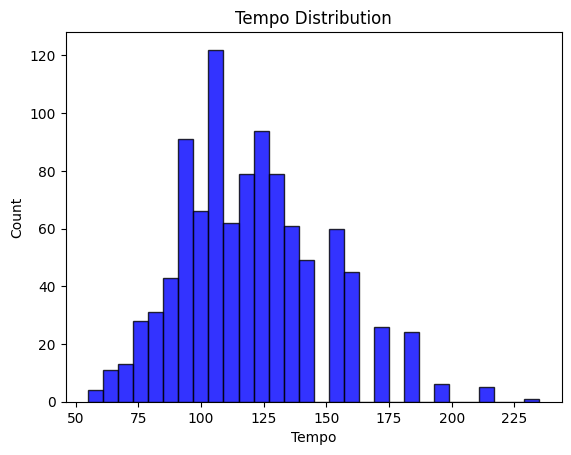

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

temp = df.select('tempo').rdd.flatMap(lambda x: x).collect()

plt.hist(temp, bins=30, color='blue', edgecolor='black', alpha=0.8)
plt.title('Tempo Distribution')
plt.xlabel('Tempo')
plt.ylabel('Count')
plt.show()


* The above is a histogram for the 'tempo' column in the dataframe 'df' using 'matplotlib' and 'seaborn' libraries. Bin size is set to 30 for granularity.

* The histogram shows that the majority of songs in the sample have tempos ranging from 75 to 150 BPM, with the most common being around 125 BPM. Song frequency decreases as tempo increases, showing fewer songs with very slow or very fast tempos. Overall, the distribution is right-skewed, indicating a preference for mid-range tempos in music production.

In [6]:
df.printSchema()

root
 |-- filename: string (nullable = true)
 |-- length: integer (nullable = true)
 |-- chroma_stft_mean: double (nullable = true)
 |-- chroma_stft_var: double (nullable = true)
 |-- rms_mean: double (nullable = true)
 |-- rms_var: double (nullable = true)
 |-- spectral_centroid_mean: double (nullable = true)
 |-- spectral_centroid_var: double (nullable = true)
 |-- spectral_bandwidth_mean: double (nullable = true)
 |-- spectral_bandwidth_var: double (nullable = true)
 |-- rolloff_mean: double (nullable = true)
 |-- rolloff_var: double (nullable = true)
 |-- zero_crossing_rate_mean: double (nullable = true)
 |-- zero_crossing_rate_var: double (nullable = true)
 |-- harmony_mean: double (nullable = true)
 |-- harmony_var: double (nullable = true)
 |-- perceptr_mean: double (nullable = true)
 |-- perceptr_var: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- mfcc1_mean: double (nullable = true)
 |-- mfcc1_var: double (nullable = true)
 |-- mfcc2_mean: double (nullable 

#Displays the structure and data types of the dataset with df.printSchema() which helps in the understanding the dataset's composition.







In [7]:
print(df.columns)


['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var', 'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var', 'label']


#Prints all the column names in the dataframe

In [8]:
unique_genres = df.select("label").distinct()

unique_genres.show()

+---------+
|    label|
+---------+
|      pop|
|    blues|
|   hiphop|
|     jazz|
|  country|
|    metal|
|     rock|
|   reggae|
|    disco|
|classical|
+---------+



#Gives the list of all unique genres in the label column

In [9]:
from pyspark.sql import functions as F

tempo_stats = df.agg(
    F.min("tempo").alias("Min Tempo"),
    F.max("tempo").alias("Max Tempo")
)

tempo_stats.show()

+------------------+------------------+
|         Min Tempo|         Max Tempo|
+------------------+------------------+
|54.978390957446805|234.90767045454547|
+------------------+------------------+



#Displays the min and max value of the tempo column

In [10]:

genre_counts = df.groupBy("label").count()

genre_counts_sorted = genre_counts.orderBy("count", ascending=False)

genre_counts_sorted.show()


+---------+-----+
|    label|count|
+---------+-----+
|      pop|  100|
|    blues|  100|
|   hiphop|  100|
|     jazz|  100|
|  country|  100|
|    metal|  100|
|     rock|  100|
|   reggae|  100|
|    disco|  100|
|classical|  100|
+---------+-----+



#Displays the number of occurences for each genre in the column 'label'

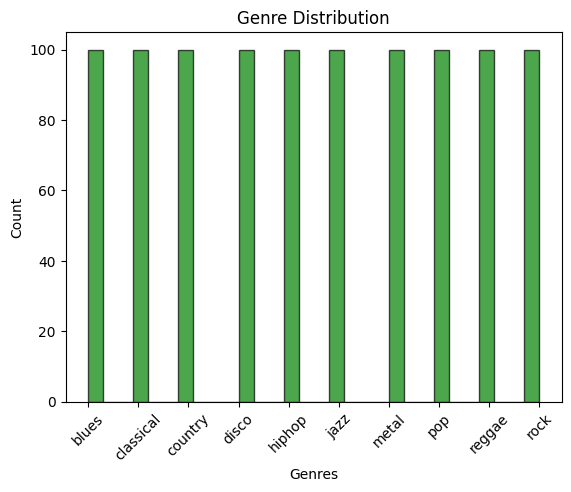

In [11]:
profit = df.select('label').rdd.flatMap(lambda x: x).collect()


plt.hist(profit, bins=30, color='green', edgecolor='black', alpha=0.7)
plt.title('Genre Distribution')
plt.xlabel('Genres')
plt.ylabel('Count')

plt.xticks(rotation=45)
plt.show()


* Bar plot showing the genres on the x-axis and count on the y-axis.

* Gives us insights into the total number of distinct genres in the dataset. From the above bar plot, we can see that there is 100 records for each distinct genres.

* So we have the same distribution for all the genres for the analysis and that ensures equal representation of all the genres for the analysis.

In [12]:
from pyspark.ml.feature import Tokenizer, NGram
from pyspark.sql.functions import explode, collect_list
from pyspark.sql import functions as F

tokenizer = Tokenizer(inputCol="label", outputCol="words")
words_df = tokenizer.transform(df)

words_list_df = words_df.groupBy("filename").agg(collect_list("words").alias("words"))

words_list_df = words_list_df.withColumn("words", F.flatten(F.col("words")))

ngram = NGram(n=2, inputCol="words", outputCol="ngrams")
ngrams_df = ngram.transform(words_list_df)

ngram_counts = ngrams_df.select(explode(F.col("ngrams")).alias("ngram")).groupBy("ngram").count()

ngram_counts.orderBy("count", ascending=False).show(10)


+-----+-----+
|ngram|count|
+-----+-----+
+-----+-----+



#There are no ngrams found in the dataset as its numerical and ngram is used to analyze sequences of words or characters in text data

# Section 2: Clean the data

10 points

Not every dataset is going to be ready to use right away. Take steps to fix incorrect inputs, remove null values, and assign datatypes that fit each feature.

### This section should include one or more of the following:
- A count of rows before and after dropping data with null or incorrect values, including an explaination of why removing the rows was necessary in [markdown](https://www.markdownguide.org/cheat-sheet).
- Renaming a column, adding a new one, or casting an existing one as a different datatype.
- Remove punctuation marks, symbols, etc from the data, and convert all upper-case lettering to lower-case.
- Remove or fix rows that have bad values/data.

In [13]:
from pyspark.sql.functions import col, count, when

null_counts = df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns])

null_counts.show()


+--------+------+----------------+---------------+--------+-------+----------------------+---------------------+-----------------------+----------------------+------------+-----------+-----------------------+----------------------+------------+-----------+-------------+------------+-----+----------+---------+----------+---------+----------+---------+----------+---------+----------+---------+----------+---------+----------+---------+----------+---------+----------+---------+-----------+----------+-----------+----------+-----------+----------+-----------+----------+-----------+----------+-----------+----------+-----------+----------+-----------+----------+-----------+----------+-----------+----------+-----------+----------+-----+
|filename|length|chroma_stft_mean|chroma_stft_var|rms_mean|rms_var|spectral_centroid_mean|spectral_centroid_var|spectral_bandwidth_mean|spectral_bandwidth_var|rolloff_mean|rolloff_var|zero_crossing_rate_mean|zero_crossing_rate_var|harmony_mean|harmony_var|percep

#Displays the number of null values in each column

In [14]:
before_count = df.count()

df_clean= df.na.drop()

after_count = df_clean.count()

print(f"Row count before: {before_count}")
print(f"Row count after: {after_count}")


Row count before: 1000
Row count after: 1000




 # Shows the number of rows before and after cleaning to understand the impact of cleaning the dataset. As the row count is 1000 before and after cleaning, it indicates that there are no null values in the dataset



In [ ]:
df_clean.show()

+---------------+------+-------------------+-------------------+-------------------+--------------------+----------------------+---------------------+-----------------------+----------------------+------------------+------------------+-----------------------+----------------------+--------------------+--------------------+--------------------+--------------------+------------------+-------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+--------------------+------------------+-------------------+------------------+--------------------+------------------+-------------------+----------

In [ ]:
from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType

print("Datatype of 'tempo' before casting:", df_clean.schema["tempo"].dataType)

df_clean = df_clean.withColumn("tempo", df_clean["tempo"].cast("float"))

print("Datatype of 'tempo' after casting:", df_clean.schema["tempo"].dataType)

Datatype of 'tempo' before casting: DoubleType()
Datatype of 'tempo' after casting: FloatType()


#Changes the datatype of column 'tempo' from 'DoubleType()' to 'FloatType()'




# Section 3: Transform the clean data

10 points

Once you have clean data, start to prepare it to fit your analysis tools. This might mean using custom code to normalize certain values, joining supplemental datasets, and/or preparing it for machine learning.

### This section should include one or more of the following:
- Write a UDF to perform a function, then use it to add a new column to your data. Explain why in [markdown](https://www.markdownguide.org/cheat-sheet)
- Join an outside data source. (It can be one you've prepared alongside the primary source you're using, as long as you link it)
- Split the data into train/test sets
- Create vectors for relavent features
- One-hot encode catagorical variables

In [15]:
from pyspark.sql.functions import col, udf
from pyspark.sql.types import StringType


def tempo_mod(tempo):
    if tempo < 100:
        return 'Slow'
    elif tempo < 140:
        return 'Medium'
    else:
        return 'Fast'

tempo_mod_udf = udf(tempo_mod, StringType())

df_clean = df.withColumn("tempo_category", tempo_mod_udf(col("tempo")))

def reorder_cl(dataframe, column_name, ref_column_name):
    ref_cl_index = dataframe.columns.index(ref_column_name)
    new_cl_order = ( dataframe.columns[:ref_cl_index + 1] + [column_name] + [col for col in dataframe.columns[ref_cl_index + 1:] if col != column_name])
    return dataframe.select(*new_cl_order)

df_clean = reorder_cl(df_clean, 'tempo_category', 'tempo')

df_clean.show()


+---------------+------+-------------------+-------------------+-------------------+--------------------+----------------------+---------------------+-----------------------+----------------------+------------------+------------------+-----------------------+----------------------+--------------------+--------------------+--------------------+--------------------+------------------+--------------+-------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+--------------------+------------------+-------------------+------------------+--------------------+------------------+---------------


#Tempos are classified as 'Slow', 'Medium', or 'Fast' based on their BPM (Beats Per Minute) values using a User-Defined Function (UDF). The new 'tempo_category'column is added right next to the existing 'tempo' column using a custom function 'reorder_cl', and displays the updated DataFrame 'df_clean'.

In [16]:
train_df, test_df = df_clean.randomSplit([0.8, 0.2], seed=42)

#The dataframe is split into training and testing sets with 80:20 ratio which indicates that 80% of the dataset is allocated for training the model and 20% for testing its performance.

In [17]:
numeric_features = [col_name for col_name, dtype in df_clean.dtypes if dtype != 'string' and col_name not in {'filename', 'label','tempo_category'}]
print(numeric_features)

['length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var', 'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var']


#A numeric_features list is produced from the dataframe which excludes columns with datatype 'string'

In [18]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline

categoricalColumns = ['label', 'filename', 'tempo_category']

indexers = [
    StringIndexer(inputCol=c, outputCol="{0}_index".format(c)).fit(df_clean)
    for c in categoricalColumns]

encoders = [
    OneHotEncoder(inputCols=[indexer.getOutputCol()], outputCols=["{0}_vec".format(indexer.getInputCol())])
    for indexer in indexers]

pipeline = Pipeline(stages=indexers + encoders)

df_encoded = pipeline.fit(df_clean).transform(df_clean)

df_encoded.show()



+---------------+------+-------------------+-------------------+-------------------+--------------------+----------------------+---------------------+-----------------------+----------------------+------------------+------------------+-----------------------+----------------------+--------------------+--------------------+--------------------+--------------------+------------------+--------------+-------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+--------------------+------------------+-------------------+------------------+--------------------+------------------+---------------


#The code applies one-hot encoding to categorical columns (label, filename, tempo_category) in a DataFrame using PySpark. It utilizes StringIndexer to convert categories to indices and OneHotEncoder to transform these indices to binary vectors. These steps are streamlined into a Pipeline, efficiently preparing the data (df_clean) for machine learning by producing an encoded DataFrame (df_encoded).

# Section 4: Show your analysis of the data

10 points

This is where the science happens. Use your data to show some kind of insight, and how you got there. Make the reader understand why it's important, and how they can get the same conslusion, and/or what would need to change to reach a different one.

### This section should include one or more of the following:
- Fit the data to a model
- Show the outcome of clustering, regression, and/or classification algorithms.
 - We used several in class, but you can use whatever fits your needs for this assignment
- Reccomend a product/item
- Use a SQL query to filter results


In [19]:
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline


numeric_features = [col for col in df_encoded.columns if col not in ['filename', 'label', 'tempo_category', 'label_index', 'filename_index', 'tempo_category_index']]
indexer = StringIndexer(inputCol="label", outputCol="labelIndex").fit(df_encoded)
assembler = VectorAssembler(inputCols=numeric_features, outputCol="features")

rf = RandomForestClassifier(labelCol="labelIndex", featuresCol="features", maxBins=1000)

pipeline = Pipeline(stages=[indexer, assembler, rf])

(train_df, test_df) = df_encoded.randomSplit([0.8, 0.2], seed=42)

model = pipeline.fit(train_df)

predictions = model.transform(test_df)

predictions.select("prediction", "labelIndex").show(20)


+----------+----------+
|prediction|labelIndex|
+----------+----------+
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
|       1.0|       1.0|
|       1.0|       1.0|
|       1.0|       1.0|
+----------+----------+
only showing top 20 rows



#The code builds and evaluates a RandomForest model on a dataset with numeric and one-hot encoded categorical features. It combines numeric features into a single vector, trains the RandomForest classifier with increased maxBins to handle high cardinality, and then splits the data for training and testing. The model's predictions are displayed, indicating its performance on unseen data.

In [20]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="labelIndex", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
evaluator_f1 = MulticlassClassificationEvaluator(labelCol="labelIndex", predictionCol="prediction", metricName="f1")
f1_score = evaluator_f1.evaluate(predictions)
print("Test Accuracy = %g" % (accuracy))
print("Test F1 Score = %g" % f1_score)


Test Accuracy = 0.901235
Test F1 Score = 0.897336


#The accuracy and the F1 score of the classification model on the test data is evaluated using the 'MulticlassClassificationEvaluator'. The predicted labels are compared against the true labels and the accuracy is printed.

In [21]:
predictions.createOrReplaceTempView("predictions")

correct_predictions = spark.sql("SELECT * FROM predictions WHERE prediction = labelIndex")

correct_predictions.show()


+-------------------+------+-------------------+-------------------+--------------------+--------------------+----------------------+---------------------+-----------------------+----------------------+------------------+------------------+-----------------------+----------------------+--------------------+--------------------+--------------------+--------------------+------------------+--------------+-------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+--------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+--------------------+------------------+-------------------+------------------+----------

#Correctly predicted instances are printed here using spark SQL to display the rows where the models predictions match the true labels in the dataset.